In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
# Begin8
# There are three files in Module 8.It has weeks and labs and assignment uploads.The class size is small though with only 11 student final grades.
# 9 Students have passed and 2 student failed this module.
#

In [8]:
# Begin8 - START OF MODULE 8
# 3 FILEES in MODULE 8
# m8mg,m8ml
# Own grades and module logs

In [6]:
# Data Preperation Module 8
#
# Module 8

module8ml = pd.read_csv('Module8-MoodleLogs.csv')

In [7]:
module8mg = pd.read_csv('Module8-MoodleGrades.csv')

In [8]:
module8og = pd.read_csv('Module8-OwnGrades.csv')

In [9]:
len(module8ml)

1759

In [10]:
print (module8og.columns.tolist())


['ID number', 'First Name', 'Surname', 'CA Mark', 'CA Mark/100', 'Exam Mark', 'Final Mark', 'Final Mark (Rounded)', 'Final Grade']


In [11]:
print (module8mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Labs (Real)', 'Quiz: CA1 - Quiz - 15% CA (Real)', 'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [12]:
# Print the number of unique values in each modul8ml column
print(module8ml.nunique())

Time              952
User full name     11
Affected user       1
Event context      40
Component           9
Event name         23
Description        35
Origin              1
IP address          1
dtype: int64


In [13]:
# Print the number of unique values in each modul8og column
print(module8og.nunique())

ID number               11
First Name              11
Surname                 11
CA Mark                 11
CA Mark/100             11
Exam Mark               11
Final Mark              11
Final Mark (Rounded)    11
Final Grade              6
dtype: int64


In [14]:
# Print the number of unique values in each modul8mgl column
print(module8ml.nunique())

Time              952
User full name     11
Affected user       1
Event context      40
Component           9
Event name         23
Description        35
Origin              1
IP address          1
dtype: int64


In [15]:
# Cleanup8
#
#

In [16]:
#time8
time8 = module8ml["Time"].str.split(",", n = 1, expand = True)

In [17]:

# making separate Date column from new data frame 
module8ml["Date"]= time8[0] 

# making seperate Time column from new data frame
module8ml['Time']= time8[1]


In [18]:
# Convert the date column to datetime64
module8ml.Date = pd.to_datetime(module8ml.Date)

In [19]:
len(module8ml)

1759

In [20]:
#Timeedit8
mask8 = (module8ml['Date'] >= StartDate) & (module8ml['Date'] <= EndDate)

module8ml = module8ml.loc[mask8]

len(module8ml)


1026

In [21]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_8 = (module8ml['Date'] >= StartDate) & (module8ml['Date'] <= TriOne)

FirstFive8 = module8ml.loc[week5_8]

len(FirstFive8)


292

In [22]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_8 = (module8ml['Date'] >= TriOne) & (module8ml['Date'] <= TriTwo)

FirstTen8 = module8ml.loc[week10_8]

len(FirstTen8)


297

In [23]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_8 = (module8ml['Date'] >= TriTwo) & (module8ml['Date'] <= EndDate)

FirstFivt8 = module8ml.loc[week15_8]

len(FirstFivt8)


441

In [24]:
module8ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [25]:
module8ml = module8ml.drop(module8ml[['IP address','Origin','Description','Affected user']], axis=1)

In [26]:
module8ml.head(2)

,Time,User full name,Event context,Component,Event name,Date
15,12:33,azCY bvQB,Course: Module 8,System,Course viewed,2019-01-21
16,00:15,aa14 bMdv,Course: Module 8,User report,Grade user report viewed,2019-01-19


In [27]:
# new data frame with split value columns 
new8 = module8ml["User full name"].str.split(" ", n = 1, expand = True)


In [28]:
# making separate first name column from new data frame 
module8ml["First name"]= new8[0] 

# making separate last name column from new data frame 
module8ml["Last name"]= new8[1] 


In [29]:
module8ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
15,12:33,azCY bvQB,Course: Module 8,System,Course viewed,2019-01-21,azCY,bvQB
16,00:15,aa14 bMdv,Course: Module 8,User report,Grade user report viewed,2019-01-19,aa14,bMdv


In [30]:
module8ml_onehot = module8ml.copy()
module8ml_onehot = pd.get_dummies(module8ml_onehot, columns=['Event name'], prefix = ['Event name'])
module8ml_onehot = pd.get_dummies(module8ml_onehot, columns=['Event context'], prefix = ['Event context'])
module8ml_onehot = pd.get_dummies(module8ml_onehot, columns=['Component'], prefix = ['Component'])


print(module8ml_onehot.head())


      Time User full name       Date First name Last name  \
15   12:33      azCY bvQB 2019-01-21       azCY      bvQB   
16   00:15      aa14 bMdv 2019-01-19       aa14      bMdv   
17   00:07      aa14 bMdv 2019-01-19       aa14      bMdv   
18   20:41      azCY bvQB 2019-01-18       azCY      bvQB   
19   18:08      azCY bvQB 2019-01-18       azCY      bvQB   

    Event name_A file has been uploaded.  \
15                                     0   
16                                     0   
17                                     0   
18                                     0   
19                                     0   

    Event name_A submission has been submitted.  \
15                                            0   
16                                            0   
17                                            0   
18                                            0   
19                                            0   

    Event name_Badge listing viewed  Event name_Course module

In [31]:
module8ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module viewed,Event name_Course user report viewed,...,Event context_URL: URL,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
15,12:33,azCY bvQB,2019-01-21,azCY,bvQB,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,00:15,aa14 bMdv,2019-01-19,aa14,bMdv,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#
#
#

In [32]:
m8mg = module8mg[['First name', 'Surname', 'ID number', 'Labs (Real)', 'Quiz: CA1 - Quiz - 15% CA (Real)', 'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', 'Course total (Real)']]

In [33]:
m8mg.head(2)

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real)
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19


In [34]:
#Engaged = > 55
engaged8 = module8og['Final Mark (Rounded)'] > 55


In [35]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module8og['engaged'] = np.where(module8og['Final Mark (Rounded)']>=55, '1', '0')


In [36]:
module8og['engaged'] = pd.to_numeric(module8og['engaged'])


In [37]:
print(module8og['engaged'].value_counts(dropna=False))

1    6
0    5
Name: engaged, dtype: int64


In [38]:
module8og.dtypes

ID number                object
First Name               object
Surname                  object
CA Mark                 float64
CA Mark/100             float64
Exam Mark               float64
Final Mark              float64
Final Mark (Rounded)    float64
Final Grade              object
engaged                   int64
dtype: object

In [39]:
m8og_subset = module8og

In [40]:
m8og_subset = m8og_subset.drop(m8og_subset[['Final Grade']], axis=1)

In [41]:
m8og_subset.dtypes

ID number                object
First Name               object
Surname                  object
CA Mark                 float64
CA Mark/100             float64
Exam Mark               float64
Final Mark              float64
Final Mark (Rounded)    float64
engaged                   int64
dtype: object

In [42]:
m8og_subset.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,0


In [86]:
#
#
#

In [43]:
# Rename the columns of df2_melted: df2_tidy
m8og_subset_tidy = m8og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)


In [44]:
# Onehot1 merge
merge_subset8 = pd.merge(module8ml_onehot,m8og_subset_tidy[['First name','engaged']],on='First name', how='left')


In [45]:
merge_subset8.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module viewed,Event name_Course user report viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,12:33,azCY bvQB,2019-01-21,azCY,bvQB,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,00:15,aa14 bMdv,2019-01-19,aa14,bMdv,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
X8s = merge_subset8.iloc[:,5:72]  #independent columns
y8s = merge_subset8.iloc[:,-1]    #target column i.e engaged


In [47]:
X8s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,Event name_Grade user report viewed,Event name_Quiz attempt reviewed,...,Event context_URL: URL,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
y8s.head(4)

0    1
1    0
2    0
3    1
Name: engaged, dtype: int64

In [49]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X8s,y8s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X8s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                             Specs      Score
20             Event context_File:  Steps(updated)  17.574968
59                                  Component_File   7.774095
3                  Event name_Course module viewed   6.588449
19                  Event context_Course: Module 8   5.587260
43  Event context_File: Lecture 1 - V Introduction   4.686366
22             Event context_File: Exam Guidelines   4.472805
56         Event context_Quiz: CA1 - Quiz - 15% CA   4.015337
63                                  Component_Quiz   4.015337
5                         Event name_Course viewed   3.984905
8              Event name_Grade user report viewed   3.748696


[3.96187380e-05 3.88104922e-05 6.17095394e-03 5.43595352e-02
 2.26087714e-03 2.83611938e-02 1.30524291e-03 6.36609702e-03
 2.30941904e-02 3.20036281e-03 1.21088700e-02 2.54668432e-05
 7.94409046e-05 3.92443511e-04 4.97345280e-05 1.43158194e-02
 1.30903930e-03 1.33065436e-02 3.89651163e-03 2.79794028e-02
 2.26859043e-01 1.15744678e-02 1.02003292e-01 2.87253704e-03
 7.40004312e-03 1.60088761e-02 4.23852652e-03 1.37757511e-02
 2.10683728e-02 7.62800569e-03 1.62105494e-03 2.73292209e-03
 3.66811098e-03 6.88343314e-03 3.60314593e-03 3.66608310e-03
 1.44325774e-03 9.96007891e-03 4.90330783e-03 7.87279518e-03
 2.20503673e-02 1.53590319e-02 1.54877787e-02 5.93611445e-02
 1.28741230e-03 6.05810767e-03 1.42168553e-03 1.91455026e-03
 4.79066819e-04 2.18119461e-03 5.14691554e-04 1.41468543e-03
 1.38664602e-03 1.14129940e-02 3.24868403e-03 1.63956404e-02
 2.95066324e-02 2.25419771e-03 1.49212417e-03 7.13533572e-02
 4.05372386e-04 3.14754558e-03 7.19271494e-03 3.00864482e-02
 2.02200416e-02 2.028898

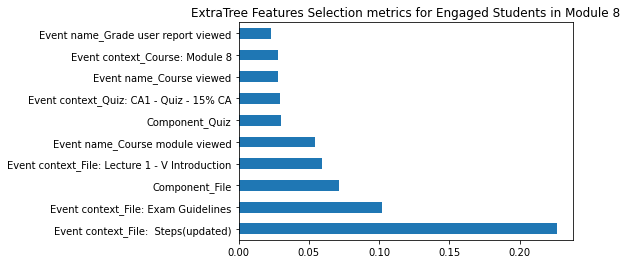

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X8s,y8s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X8s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 8')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


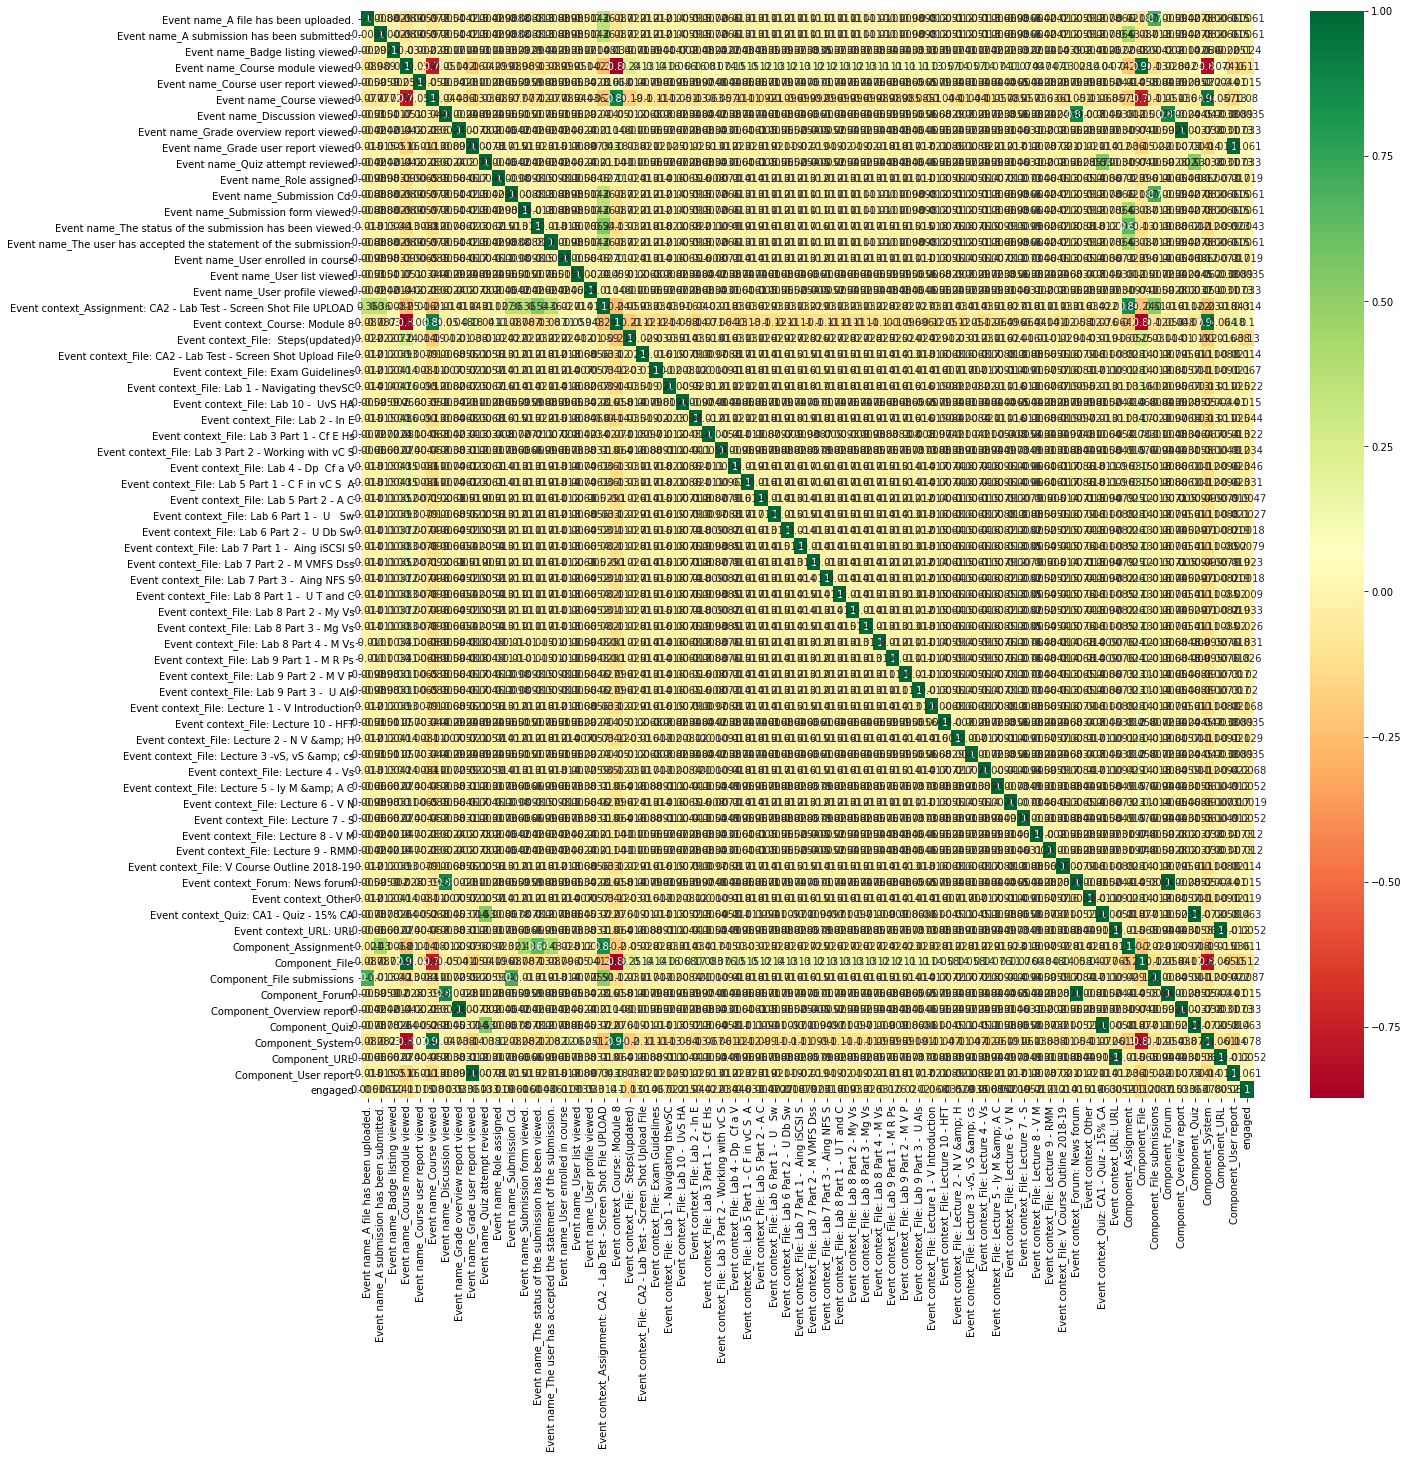

In [50]:
#get correlations of each features in dataset
corrmat = merge_subset8.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset8[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [54]:
# EndofFs8
# 20             Event context_File:  Steps(updated)  17.574968
#59                                  Component_File   7.774095
#3                  Event name_Course module viewed   6.588449
#19                  Event context_Course: Module 8   5.587260
#43  Event context_File: Lecture 1 - V Introduction   4.686366
#22             Event context_File: Exam Guidelines   4.472805
#56         Event context_Quiz: CA1 - Quiz - 15% CA   4.015337
#63                                  Component_Quiz   4.015337
#5                         Event name_Course viewed   3.984905
#8              Event name_Grade user report viewed   3.748696
#

In [51]:
featselect8 = X8s[['Event context_File:  Steps(updated)','Component_File','Event name_Course module viewed','Event context_Course: Module 8','Event context_File: Lecture 1 - V Introduction','Event context_File: Exam Guidelines','Event context_Quiz: CA1 - Quiz - 15% CA','Component_Quiz','Event name_Course viewed','Event name_Grade user report viewed']]

In [52]:
Xfs8 = featselect8 # Features
yfs8 = y8s # Target variable


In [53]:
# Split dataset into training set and test set
Xfs8_train, Xfs8_test, yfs8_train, yfs8_test = train_test_split(Xfs8, yfs8, test_size=0.3, random_state=1) # 70% training and 30% test


In [156]:
# Create Decision Tree classifer object
dtclffs8 = DecisionTreeClassifier(max_depth =3,criterion = 'gini',max_features =10)

# Train Decision Tree Classifer
dtclffs8 = dtclffs8.fit(Xfs8_train,yfs8_train)

#Predict the response for test dataset
yfs8_pred = dtclffs8.predict(Xfs8_test)


In [157]:
# Compute accuracy
print(dtclffs8.score(Xfs8_test, yfs8_test))

0.6655844155844156


In [158]:
cvscores_10dt = cross_val_score(dtclffs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10dt))

0.6434272300469482


In [143]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None, 9, 15],
              "max_features": [1, 3, 10],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(dtclffs8, param_grid)

# Fit the model
grid_search.fit(Xfs8_test,yfs8_test)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [144]:
# To identify the best hyperparameters.
grid_search.best_params_


{'criterion': 'gini', 'max_depth': 3, 'max_features': 10}

In [64]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs8 = LogisticRegression()

# fit the model with data
logregfs8.fit(Xfs8_train,yfs8_train)

#
ylg8_pred=logregfs8.predict(Xfs8_test)


In [65]:
# Compute accuracy
print(logregfs8.score(Xfs8_test, yfs8_test))

0.6655844155844156


In [66]:
cvscores_10lr = cross_val_score(logregfs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10lr))

0.6406494522691706


In [159]:
# Instantiate the classifier
rfclffs8 = RandomForestClassifier(n_estimators =1,bootstrap = 'true',criterion ='gini',max_depth =9,max_features = 9)

# Fit to the training data
rfclffs8.fit(Xfs8_train, yfs8_train)

# Compute accuracy
print(rfclffs8.score(Xfs8_test, yfs8_test))


0.6558441558441559


In [160]:
cvscores_10rf = cross_val_score(rfclffs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10rf))

0.6350547730829421


In [148]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, 5, 9],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators":[1, 5, 10, 20]}

# Call GridSearchCV
grid_search = GridSearchCV(rfclffs8, param_grid)

# Fit the model
grid_search.fit(Xfs8_test,yfs8_test)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False,
                                              ran

In [149]:
# To identify the best hyperparameters.
grid_search.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 3,
 'n_estimators': 1}

In [153]:
from sklearn.svm import SVC

svcfs8 = SVC(kernel='poly',C=0.5)

#Train it, or "fit it", to the data:
svcfs8.fit(Xfs8_train, yfs8_train)

# Compute accuracy
print(svcfs8.score(Xfs8_test, yfs8_test))


0.6655844155844156


In [154]:
cvscores_10svc = cross_val_score(svcfs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10svc))

0.6392605633802816


In [152]:

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf']
             ,'C':[0.1,0.5,1.0]}

# Call GridSearchCV
grid_search = GridSearchCV(svcfs8, param_grid)

# Fit the model
grid_search.fit(Xfs8_test, yfs8_test)

# Print the optimal parameters
print(grid_search.best_params_)


{'C': 0.5, 'kernel': 'poly'}


In [66]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs8_test, yfs8_pred))


Accuracy: 0.668831168831


In [67]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs8_test, yfs8_pred))


0.676056338028


In [68]:
# Import recall_score - High recall
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs8_test, yfs8_pred))


0.950495049505


In [69]:
#F1 score
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(yfs8_test, yfs8_pred))


0.79012345679


In [70]:
print("Accuracy:",metrics.accuracy_score(yfs8_test, yfs8_pred))
print("Precision:",metrics.precision_score(yfs8_test, yfs8_pred))
print("Recall:",metrics.recall_score(yfs8_test, yfs8_pred))
print("F1 Score",metrics.f1_score(yfs8_test, yfs8_pred))

# F1 Score is the weighted average of Precision and Recall. 
#Therefore, this score takes both false positives and false negatives into account. 
#Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy,
#especially if you have an uneven class distribution

Accuracy: 0.668831168831
Precision: 0.676056338028
Recall: 0.950495049505
F1 Score 0.79012345679


In [71]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs8_test, yfs8_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs8_test, yfs8_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs8_test, yfs8_pred)))

Mean Absolute Error: 0.331168831169
Mean Squared Error: 0.331168831169
Root Mean Squared Error: 0.575472702366


In [71]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs8_test, ylg8_pred))
print(classification_report(yfs8_test, ylg8_pred))


[[ 10  96]
 [  7 195]]
              precision    recall  f1-score   support

           0       0.59      0.09      0.16       106
           1       0.67      0.97      0.79       202

    accuracy                           0.67       308
   macro avg       0.63      0.53      0.48       308
weighted avg       0.64      0.67      0.57       308



In [72]:
# import the metrics class
from sklearn import metrics
cnflr8_matrix = metrics.confusion_matrix(yfs8_test, ylg8_pred)
cnflr8_matrix


array([[ 10,  96],
       [  7, 195]], dtype=int64)

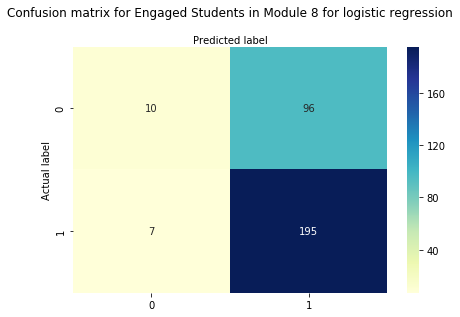

In [140]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr8_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Engaged Students in Module 8 for logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


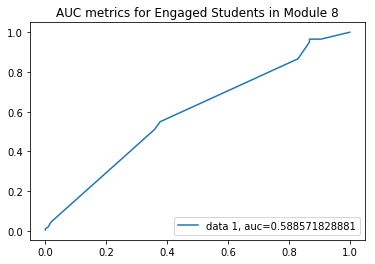

In [144]:
ylg8_pred_proba = logregfs8.predict_proba(Xfs8_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs8_test,  ylg8_pred_proba)
auc = metrics.roc_auc_score(yfs8_test, ylg8_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 8')

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.54. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


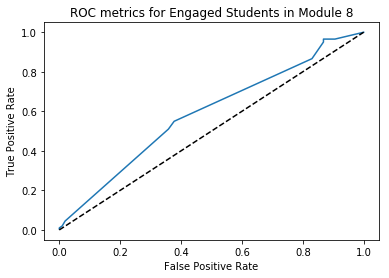

In [143]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs8_test, ylg8_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 8')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [ ]:
#``

In [139]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs8_train, yfs8_train)

# Predict
bagged_pred = bagged_model.predict(Xfs8_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs8_test, bagged_pred))


0.6688311688311688


In [161]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(bagged_model, Xfs8_train, yfs8_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10))

0.6420618317061831
0.6378521126760563


In [163]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs8_train, yfs8_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs8_test)

# Print model accuracy
print(accuracy_score(yfs8_test, boosted_pred))


0.6785714285714286


In [164]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(boosted_model, Xfs8_train, yfs8_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10))

0.6420618317061831
0.6378521126760563


In [75]:
import xgboost as xgb

In [165]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs8_train, yfs8_train)

# Predict
xgb_pred = xgb.predict(Xfs8_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs8_test, xgb_pred))


Final prediction score: [0.66558442]


In [166]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(xgb, Xfs8_train, yfs8_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10))

0.6434565318456532
0.6434272300469482


In [140]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs8_test, bagged_pred))
print(classification_report(yfs8_test, bagged_pred))


[[ 14  92]
 [ 10 192]]
              precision    recall  f1-score   support

           0       0.58      0.13      0.22       106
           1       0.68      0.95      0.79       202

    accuracy                           0.67       308
   macro avg       0.63      0.54      0.50       308
weighted avg       0.64      0.67      0.59       308



In [ ]:
#``

In [ ]:
#Trimester1

In [54]:
FirstFive8.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,Date
609,15:27,aL20 blLY,-,File: V Course Outline 2018-19,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1,2018-10-12
610,15:27,aL20 blLY,-,Course: Module 8,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2018-10-12


In [55]:
FirstFive8= FirstFive8.drop(FirstFive8[['IP address','Origin','Description','Affected user']], axis=1)


In [56]:
FirstFive8.head(2)

,Time,User full name,Event context,Component,Event name,Date
609,15:27,aL20 blLY,File: V Course Outline 2018-19,File,Course module viewed,2018-10-12
610,15:27,aL20 blLY,Course: Module 8,System,Course viewed,2018-10-12


In [57]:
FirstFive8_onehot = FirstFive8.copy()
FirstFive8_onehot = pd.get_dummies(FirstFive8_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive8_onehot = pd.get_dummies(FirstFive8_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive8_onehot = pd.get_dummies(FirstFive8_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive8_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



       Time User full name       Date  Event name_Course module viewed  \
609   15:27      aL20 blLY 2018-10-12                                1   
610   15:27      aL20 blLY 2018-10-12                                0   
611   15:27      aL20 blLY 2018-10-12                                0   
612   15:26      aL20 blLY 2018-10-12                                0   
613   13:12      aa14 bMdv 2018-10-12                                1   

     Event name_Course viewed  Event name_Grade user report viewed  \
609                         0                                    0   
610                         1                                    0   
611                         0                                    1   
612                         1                                    0   
613                         0                                    0   

     Event name_Role assigned  Event name_User enrolled in course  \
609                         0                                   0

In [58]:
FirstFive8_onehot.head(2)

,Time,User full name,Date,Event name_Course module viewed,Event name_Course viewed,Event name_Grade user report viewed,Event name_Role assigned,Event name_User enrolled in course,Event name_User list viewed,Event name_User profile viewed,...,Event context_File: Lecture 2 - N V &amp; H,Event context_File: V Course Outline 2018-19,Event context_Forum: News forum,Event context_Other,Event context_URL: URL,Component_File,Component_Forum,Component_System,Component_URL,Component_User report
609,15:27,aL20 blLY,2018-10-12,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
610,15:27,aL20 blLY,2018-10-12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# new data frame with split value columns 
new8a = FirstFive8_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [60]:
# making separate first name column from new data frame 
FirstFive8_onehot["First name"]= new8a[0] 

# making separate last name column from new data frame 
FirstFive8_onehot["Last name"]= new8a[1] 


In [61]:
FirstFive8_onehot.head(2)

,Time,User full name,Date,Event name_Course module viewed,Event name_Course viewed,Event name_Grade user report viewed,Event name_Role assigned,Event name_User enrolled in course,Event name_User list viewed,Event name_User profile viewed,...,Event context_Forum: News forum,Event context_Other,Event context_URL: URL,Component_File,Component_Forum,Component_System,Component_URL,Component_User report,First name,Last name
609,15:27,aL20 blLY,2018-10-12,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,aL20,blLY
610,15:27,aL20 blLY,2018-10-12,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,aL20,blLY


In [62]:
# Merge subset
merge_subset8_tri = pd.merge(FirstFive8_onehot,m8og_subset_tidy[['First name','engaged']],on='First name', how='left')

In [63]:
merge_subset8_tri.head(2)

,Time,User full name,Date,Event name_Course module viewed,Event name_Course viewed,Event name_Grade user report viewed,Event name_Role assigned,Event name_User enrolled in course,Event name_User list viewed,Event name_User profile viewed,...,Event context_Other,Event context_URL: URL,Component_File,Component_Forum,Component_System,Component_URL,Component_User report,First name,Last name,engaged
0,15:27,aL20 blLY,2018-10-12,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,aL20,blLY,1
1,15:27,aL20 blLY,2018-10-12,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,aL20,blLY,1


In [64]:
X58s = merge_subset8_tri.iloc[:,3:28]  #independent columns
y58s = merge_subset8_tri.iloc[:,-1]    #target column i.e engaged


In [65]:
X58s.head(2)

,Event name_Course module viewed,Event name_Course viewed,Event name_Grade user report viewed,Event name_Role assigned,Event name_User enrolled in course,Event name_User list viewed,Event name_User profile viewed,Event context_Course: Module 8,Event context_File: Steps(updated),Event context_File: Lab 1 - Navigating thevSC,...,Event context_File: Lecture 2 - N V &amp; H,Event context_File: V Course Outline 2018-19,Event context_Forum: News forum,Event context_Other,Event context_URL: URL,Component_File,Component_Forum,Component_System,Component_URL,Component_User report
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
y58s.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [67]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X58s,y58s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X58s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                             Specs     Score
8              Event context_File:  Steps(updated)  4.268564
1                         Event name_Course viewed  2.845315
0                  Event name_Course module viewed  2.490406
7                   Event context_Course: Module 8  2.423098
20                                  Component_File  2.376940
22                                Component_System  2.039244
14  Event context_File: Lecture 1 - V Introduction  1.419767
2              Event name_Grade user report viewed  1.415205
6                   Event name_User profile viewed  1.415205
24                           Component_User report  1.415205


[0.04350585 0.10122364 0.03819995 0.01619031 0.01789097 0.07382953
 0.06583136 0.04516639 0.14368447 0.01931784 0.02332918 0.04592402
 0.00565313 0.03072375 0.05091312 0.00887365 0.00531937 0.0236734
 0.07957458 0.01867364 0.04337866 0.02167662 0.03965855 0.01244312
 0.02534491]


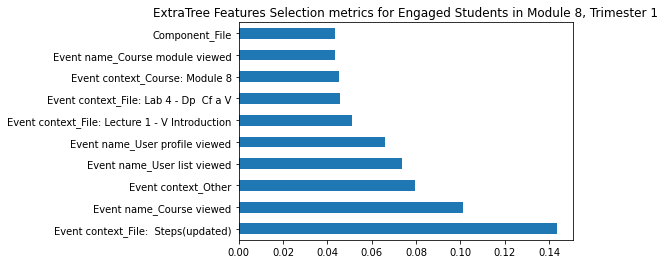

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X58s,y58s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X58s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 8, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


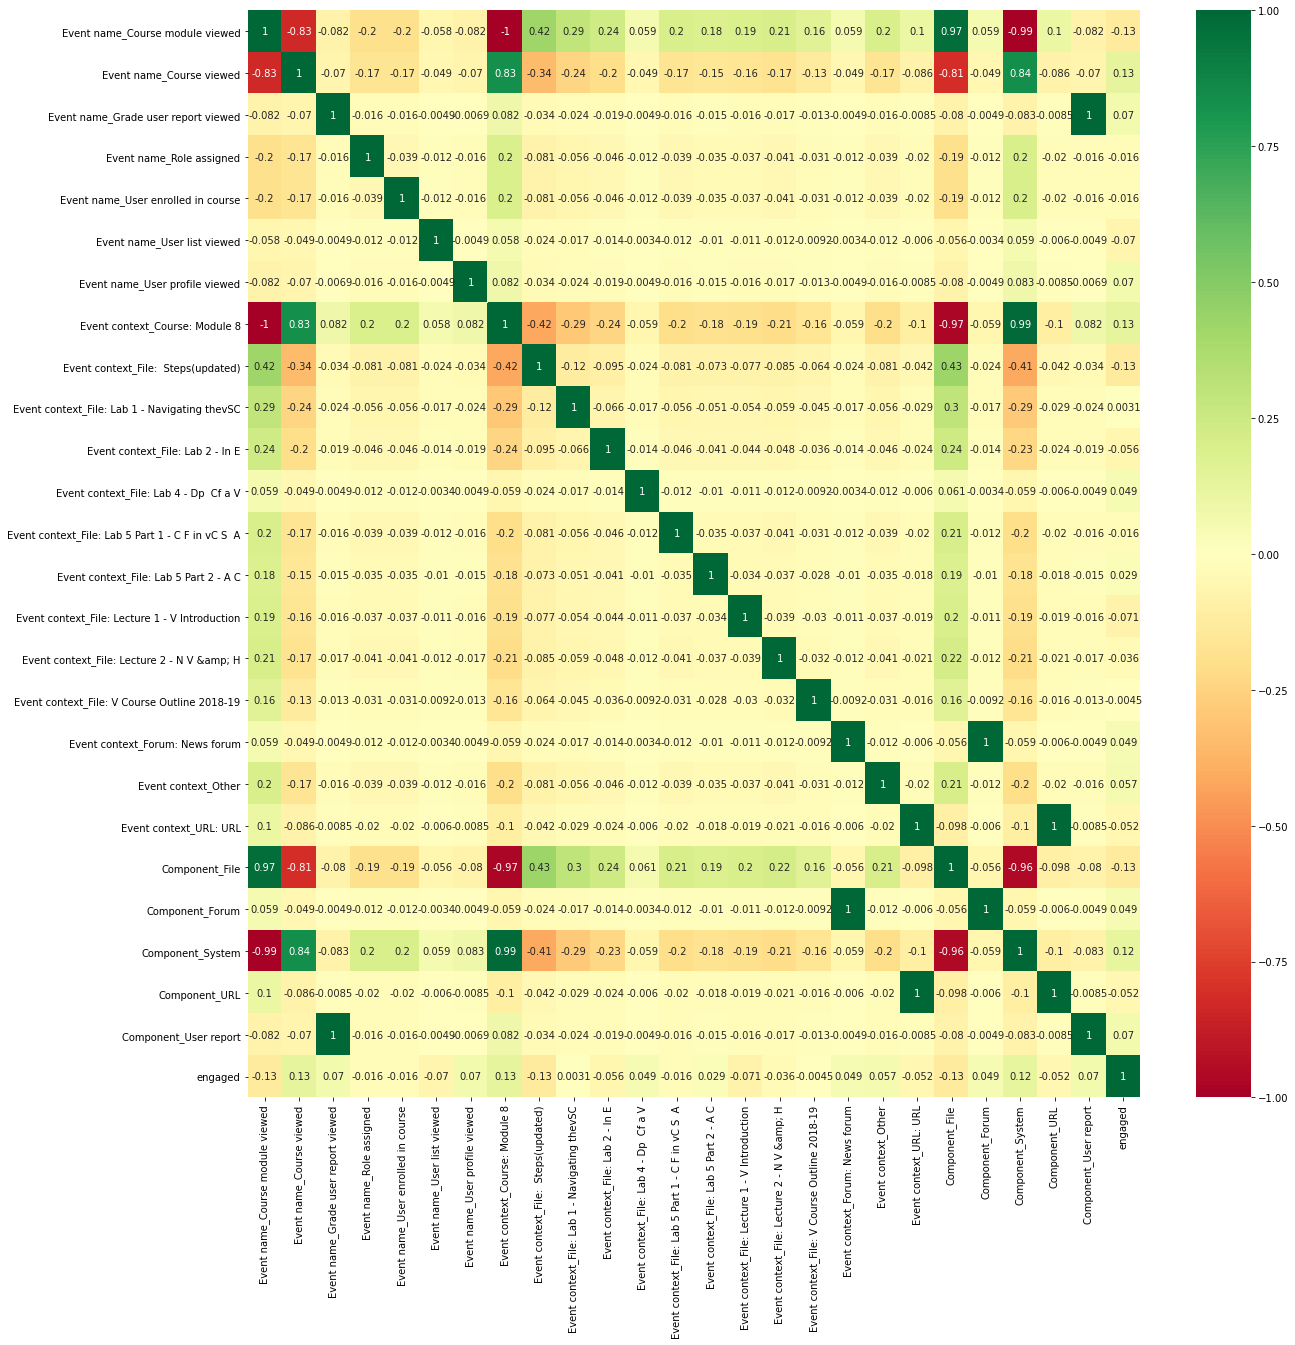

In [92]:
#get correlations of each features in dataset
corrmat = merge_subset8_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset8_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [93]:
X58s.columns

Index(['Event name_Course module viewed', 'Event name_Course viewed',
       'Event name_Grade user report viewed', 'Event name_Role assigned',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed', 'Event context_Course: Module 8',
       'Event context_File:  Steps(updated)',
       'Event context_File: Lab 1 - Navigating thevSC',
       'Event context_File: Lab 2 - In E',
       'Event context_File: Lab 4 - Dp  Cf a V',
       'Event context_File: Lab 5 Part 1 - C F in vC S  A',
       'Event context_File: Lab 5 Part 2 - A C',
       'Event context_File: Lecture 1 - V Introduction',
       'Event context_File: Lecture 2 - N V &amp; H',
       'Event context_File: V Course Outline 2018-19',
       'Event context_Forum: News forum', 'Event context_Other',
       'Event context_URL: URL', 'Component_File', 'Component_Forum',
       'Component_System', 'Component_URL', 'Component_User report'],
      dtype='object')

In [ ]:
#
#8              Event context_File:  Steps(updated)  4.268564
#1                         Event name_Course viewed  2.845315
#0                  Event name_Course module viewed  2.490406
#7                   Event context_Course: Module 8  2.423098
#20                                  Component_File  2.376940
#22                                Component_System  2.039244
#14  Event context_File: Lecture 1 - V Introduction  1.419767
#2              Event name_Grade user report viewed  1.415205
#6                   Event name_User profile viewed  1.415205
#24                           Component_User report  1.415205

In [69]:
feattime58 = X58s[['Event context_File:  Steps(updated)','Event name_Course viewed','Event name_Course module viewed','Event context_Course: Module 8','Component_File','Component_System','Event context_File: Lecture 1 - V Introduction','Event name_Grade user report viewed','Event name_User profile viewed','Component_User report']]

In [70]:
Xt8a = feattime58 # Features
yt8a = y58s # Target variable

In [71]:
# Create training and testing sets
Xt8a_train, Xt8a_test, yt8a_train, yt8a_test = train_test_split(Xt8a, yt8a, test_size=0.3)


In [167]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt8a = LogisticRegression()

# fit the model with data
logregt8a.fit(Xt8a_train,yt8a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
# Compute accuracy
print(logregt8a.score(Xt8a_test, yt8a_test))


0.6136363636363636


In [169]:
yt8a_pred=logregt8a.predict(Xt8a_test)

In [101]:
# Perform 10-fold CV
cvscores_8a = cross_val_score(logregt8a, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_8a))

0.5885714285714285


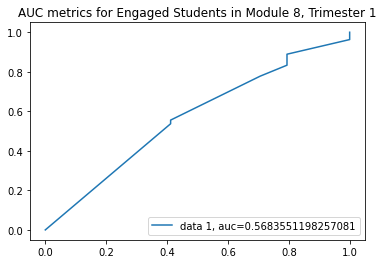

In [99]:
ylg8a_pred_proba = logregt8a.predict_proba(Xt8a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt8a_test,  ylg8a_pred_proba)
auc = metrics.roc_auc_score(yt8a_test, ylg8a_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('AUC metrics for Engaged Students in Module 8, Trimester 1')
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.60. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


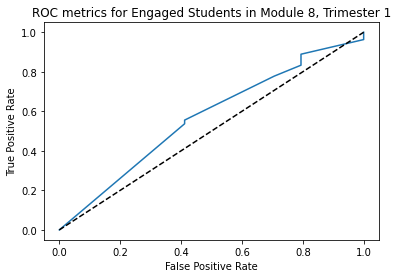

In [100]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt8a_test, ylg8a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 8, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [102]:
print("Accuracy:",metrics.accuracy_score(yt8a_test, yt8a_pred))
print("Precision:",metrics.precision_score(yt8a_test, yt8a_pred))
print("Recall:",metrics.recall_score(yt8a_test, yt8a_pred))
print("F1 Score",metrics.f1_score(yt8a_test, yt8a_pred))


Accuracy: 0.6136363636363636
Precision: 0.6351351351351351
Recall: 0.8703703703703703
F1 Score 0.734375


In [173]:
# Instantiate the classifier
rfclffs8a = RandomForestClassifier(n_estimators =1,bootstrap = 'true',criterion ='gini',max_depth =9,max_features = 9)

# Fit to the training data
rfclffs8a.fit(Xt8a_train, yt8a_train)

# Compute accuracy
print(rfclffs8a.score(Xt8a_test, yt8a_test))


0.5909090909090909


In [174]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs8a, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.5676190476190477


In [155]:
from sklearn.svm import SVC

svcfs8a = SVC(kernel='poly',C=0.5)

#Train it, or "fit it", to the data:
svcfs8a.fit(Xt8a_train, yt8a_train)

# Compute accuracy
print(svcfs8a.score(Xt8a_test, yt8a_test))


0.625


In [108]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs8a, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.5735714285714285


In [170]:
# Create Decision Tree classifer object
dtclffs8a = DecisionTreeClassifier(max_depth =3,criterion = 'gini',max_features =10)

# Train Decision Tree Classifer
dtclffs8a = dtclffs8a.fit(Xt8a_train,yt8a_train)

#Predict the response for test dataset
yfs8a_pred = dtclffs8a.predict(Xt8a_test)


In [171]:
# Compute accuracy
print(dtclffs8a.score(Xt8a_test, yt8a_test))

0.625


In [172]:
# Perform 10-fold CV
cvscores_10dt8a = cross_val_score(dtclffs8a, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_10dt8a))

0.588095238095238


In [118]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt8a_test, yt8a_pred))
print(classification_report(yt8a_test, yt8a_pred))


[[ 7 27]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.50      0.21      0.29        34
           1       0.64      0.87      0.73        54

    accuracy                           0.61        88
   macro avg       0.57      0.54      0.51        88
weighted avg       0.58      0.61      0.56        88



In [ ]:
#``

In [134]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt8a_train, yt8a_train)

# Predict
bagged_pred = bagged_model.predict(Xt8a_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yt8a_test, bagged_pred))


0.5909090909090909


In [175]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(bagged_model, Xt8a_train, yt8a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(bagged_model, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_10))

0.5882352941176471
0.5778571428571427


In [176]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt8a_train, yt8a_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt8a_test)

# Print model accuracy
print(accuracy_score(yt8a_test, boosted_pred))


0.5909090909090909


In [177]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(boosted_model, Xt8a_train, yt8a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(boosted_model, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_10))

0.5931372549019608
0.583095238095238


In [121]:
import xgboost as xgb

In [178]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt8a_train, yt8a_train)

# Predict
xgb_pred = xgb.predict(Xt8a_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt8a_test, xgb_pred))


Final prediction score: [0.62500000]


In [179]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(xgb, Xt8a_train, yt8a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(xgb, Xt8a_train, yt8a_train, cv = 10)
print(np.mean(cvscores_10))

0.607843137254902
0.6078571428571428


In [142]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt8a_test, xgb_pred))
print(classification_report(yt8a_test, xgb_pred))


[[ 7 27]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.54      0.21      0.30        34
           1       0.64      0.89      0.74        54

    accuracy                           0.62        88
   macro avg       0.59      0.55      0.52        88
weighted avg       0.60      0.62      0.57        88



In [ ]:
#``

In [72]:
#Feature selection
Xm8og = m8og_subset.iloc[:,3:8]  #independent columns
ym8og = m8og_subset.iloc[:,-1]    #target column i.e engaged


In [73]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(Xm8og,ym8og)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm8og.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                  Specs      Score
1           CA Mark/100  81.194473
3            Final Mark  69.067578
4  Final Mark (Rounded)  69.067578
2             Exam Mark  57.247922
0               CA Mark  40.597236


[0.18874339 0.20911825 0.15819894 0.23509497 0.20884444]


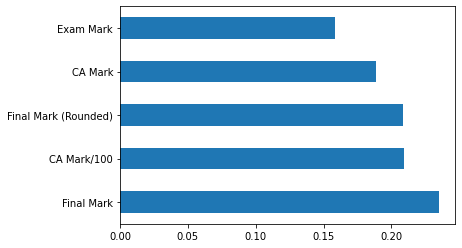

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm8og,ym8og)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm8og.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


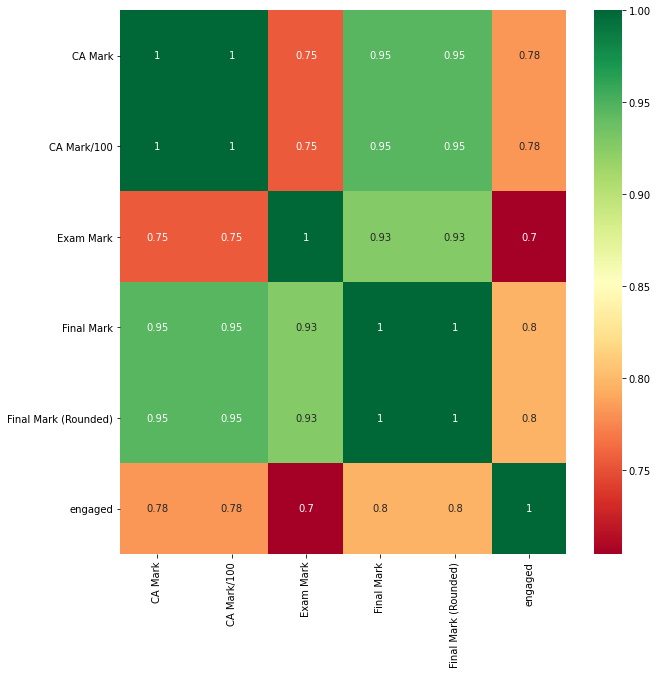

In [75]:
#get correlations of each features in dataset
corrmat = m8og_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m8og_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [76]:
spear1 = m8og_subset['CA Mark/100']

In [78]:
m8og_subset.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,0


In [79]:
spear2 = m8og_subset['engaged']

In [80]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.8082903768654761, pvalue=0.0026040009823756973)


In [94]:
spear3 = m8og_subset['Exam Mark']

In [95]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.84545454545454546, pvalue=0.0010451821458586869)


In [44]:
module8og.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),Final Grade,engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,B,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,F,0


In [55]:
m8og_subset.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,0


In [82]:
m8mg.head()

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real)
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19
2,aAK5,bSAb,tAK5SAbE,0.0,0.00,0.0,0.00
3,a4jV,bO8M,14jVO8M7,9.5,10.33,24.0,43.83
4,aa14,bMdv,ba14Mdv9,6.5,9.61,11.0,27.11


In [123]:
#Engaged = > 55
engagedm8mg = m8mg['Course total (Real)'] > 55


In [124]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m8mg['engaged'] = np.where(m8mg['Course total (Real)']>=55, '1', '0')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:

m8mg['engaged'] = pd.to_numeric(m8mg['engaged'])


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
m8mg_subset = m8mg

In [127]:
m8mg_subset.head(2)

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89,0
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19,0


In [128]:
#Feature selection
Xm8mg = m8mg_subset.iloc[:,3:7]  #independent columns
ym8mg = m8mg_subset.iloc[:,-1]    #target column i.e engaged


In [129]:

# No one passed the course total real > 55
ym8mg

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: engaged, dtype: int64

In [130]:
Xm8mg.head(2)

,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real)
0,10.0,12.39,23.5,45.89
1,9.5,11.19,24.5,45.19


In [131]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(Xm8mg,ym8mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm8mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


Empty DataFrame
Columns: [Specs, Score]
Index: []


[0. 0. 0. 0.]


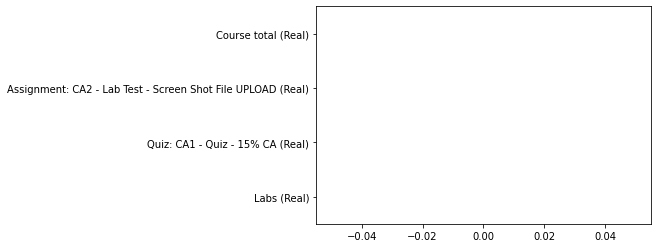

In [132]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm8mg,ym8mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm8mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


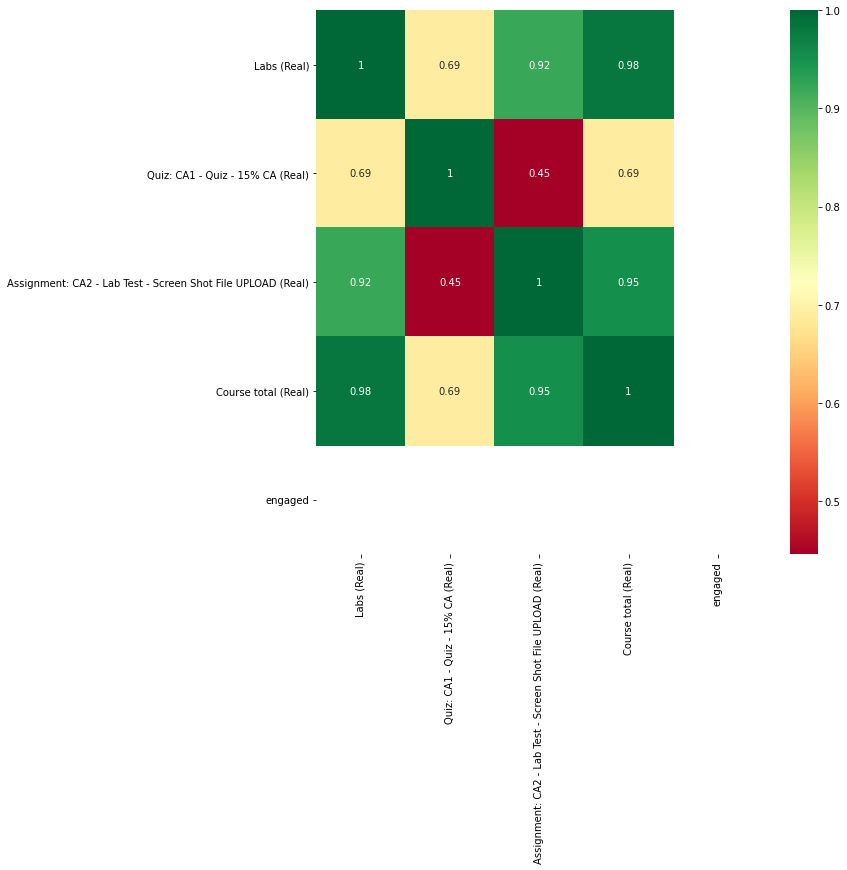

In [133]:
#get correlations of each features in dataset
corrmat = m8mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m8mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


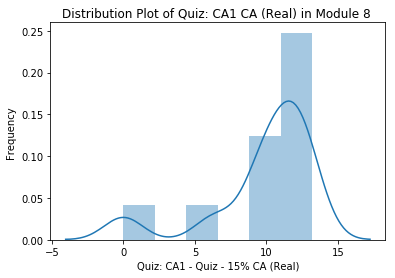

In [120]:
# Visualize the distribution of Quiz: CA1 - Quiz - 15% CA (Real) in Module 8'

sns.distplot(m8mg['Quiz: CA1 - Quiz - 15% CA (Real)'])
plt.title('Distribution Plot of Quiz: CA1 CA (Real) in Module 8 ')
plt.ylabel('Frequency ')

In [71]:
module8og.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CA Mark,11.0,31.850909,14.527275,0.0,24.785,31.59,44.505,47.07
CA Mark/100,11.0,63.701818,29.054549,0.0,49.570,63.18,89.010,94.14
Exam Mark,11.0,54.318182,25.029256,0.0,44.750,53.00,76.000,83.50
Final Mark,11.0,59.010000,25.341010,0.0,50.285,66.71,75.000,88.82
Final Mark (Rounded),11.0,59.010000,25.341010,0.0,50.285,66.71,75.000,88.82
engaged,11.0,0.545455,0.522233,0.0,0.000,1.00,1.000,1.00


In [74]:
module8ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
15,12:33,azCY bvQB,Course: Module 8,System,Course viewed,2019-01-21,azCY,bvQB
16,00:15,aa14 bMdv,Course: Module 8,User report,Grade user report viewed,2019-01-19,aa14,bMdv


In [79]:
module8ml.info

<bound method DataFrame.info of         Time User full name                     Event context    Component  \
15     12:33      azCY bvQB                  Course: Module 8       System   
16     00:15      aa14 bMdv                  Course: Module 8  User report   
17     00:07      aa14 bMdv                  Course: Module 8       System   
18     20:41      azCY bvQB                  Course: Module 8       System   
19     18:08      azCY bvQB                  Course: Module 8       System   
20     16:57      aw97 baOy                  Course: Module 8       System   
21     16:57      aw97 baOy                 Forum: News forum        Forum   
22     16:57      aw97 baOy                  Course: Module 8       System   
23     13:33      azCY bvQB                  Course: Module 8       System   
24     13:32      azCY bvQB                  Course: Module 8       System   
25     12:49      aa14 bMdv                  Course: Module 8  User report   
26     12:49      aa14 bMdv     

In [75]:
m8ml = module8ml

In [76]:
#m8ml = module8ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]


In [77]:
m8ml.describe().transpose()
# Student who was most frequent was aa14 bMdv
# Event context : Course Module 8 

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 8/11/18, 14:26 most frequent time
#User full name: Name of the user is listed in this column. - aa14 bMdv	 was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Course: Module 8		 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, File was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.


,count,unique,top,freq,first,last
Time,1026,338,14:09,19,NaN,NaN
User full name,1026,11,aa14 bMdv,155,NaN,NaN
Event context,1026,40,Course: Module 8,471,NaN,NaN
Component,1026,9,File,474,NaN,NaN
Event name,1026,18,Course module viewed,485,NaN,NaN
Date,1026,41,2018-12-13 00:00:00,202,2018-09-20 00:00:00,2019-01-21 00:00:00
First name,1026,11,aa14,155,NaN,NaN
Last name,1026,11,bMdv,155,NaN,NaN


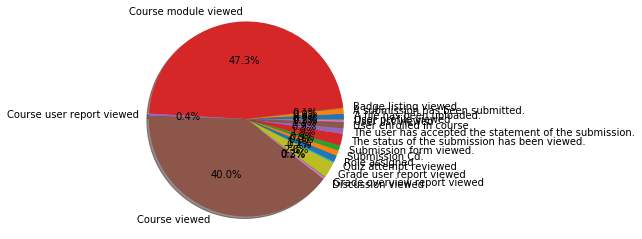

In [82]:
labels = module8ml['Event name'].astype('category').cat.categories.tolist()
counts = module8ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

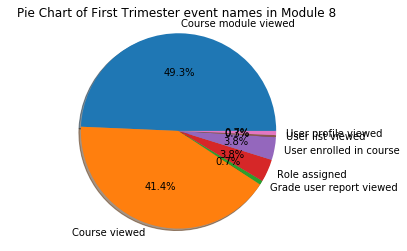

In [118]:
labels = FirstFive8['Event name'].astype('category').cat.categories.tolist()
counts = FirstFive8['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pie Chart of First Trimester event names in Module 8 ')
plt.show()


In [85]:
FirstFive8["Event name"].value_counts()


Course module viewed        144
Course viewed               121
Role assigned                11
User enrolled in course      11
Grade user report viewed      2
User profile viewed           2
User list viewed              1
Name: Event name, dtype: int64

In [84]:
module8ml["Event name"].value_counts()


Course module viewed                                      485
Course viewed                                             410
Grade user report viewed                                   27
The status of the submission has been viewed.              20
User enrolled in course                                    11
Role assigned                                              11
Submission form viewed.                                     9
Submission Cd.                                              9
A submission has been submitted.                            9
The user has accepted the statement of the submission.      9
A file has been uploaded.                                   9
Course user report viewed                                   4
User list viewed                                            3
Discussion viewed                                           3
Quiz attempt reviewed                                       2
Grade overview report viewed                                2
User pro

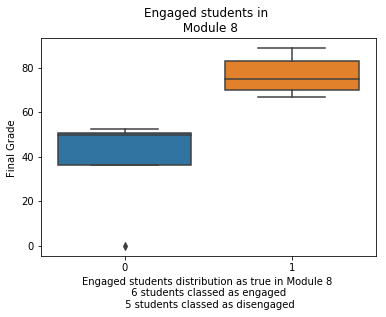

In [127]:
sns.boxplot(x = 'engaged', y = 'Final Mark (Rounded)', data = module8og)
plt.title('Engaged students in \n Module 8')
plt.xlabel('Engaged students distribution as true in Module 8 \n 6 students classed as engaged \n 5 students classed as disengaged')
plt.ylabel('Final Grade ')

In [125]:
engaged8.sum()

6

In [128]:
chi = stats.chisquare(engaged8)
print(chi)

Power_divergenceResult(statistic=5.0, pvalue=0.89117801891415127)


In [129]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between engaged found")

No significant difference between engaged found


In [130]:
merge_subset8_nullity = merge_subset8.isnull()

In [131]:
merge_subset8_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = merge_subset8_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 0 percent of missing values

Percentage of Missing Values:
 Time                                                                  0.0
User full name                                                        0.0
Date                                                                  0.0
First name                                                            0.0
Last name                                                             0.0
Event name_A file has been uploaded.                                  0.0
Event name_A submission has been submitted.                           0.0
Event name_Badge listing viewed                                       0.0
Event name_Course module viewed                                       0.0
Event name_Course user report viewed                                  0.0
Event name_Course viewed                                              0.0
Event name_Discussion viewed                                          0.0
Event name_Grade overview report viewed                               0.0
Event n

In [135]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset8.engaged)
print(shapirodis)

(0.609338641166687, 4.44211613190967e-43)


In [136]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset8_tri.engaged)
print(shapirodis)

(0.6257305145263672, 9.046403439508761e-25)


In [96]:
Powerfeatselect8 = merge_subset8[['Event context_File:  Steps(updated)','Component_File','Event name_Course module viewed','Event context_Course: Module 8','Event context_File: Lecture 1 - V Introduction','Event context_File: Exam Guidelines','Event context_Quiz: CA1 - Quiz - 15% CA','Component_Quiz','Event name_Course viewed','Event name_Grade user report viewed','engaged']]

In [97]:
Powerfeatselect8.groupby(['engaged']).mean()

,Event context_File: Steps(updated),Component_File,Event name_Course module viewed,Event context_Course: Module 8,Event context_File: Lecture 1 - V Introduction,Event context_File: Exam Guidelines,Event context_Quiz: CA1 - Quiz - 15% CA,Component_Quiz,Event name_Course viewed,Event name_Grade user report viewed
engaged,,,,,,,,,,
0,0.088235,0.540107,0.545455,0.393048,0.026738,0.005348,0.000000,0.000000,0.347594,0.013369
1,0.027607,0.417178,0.430982,0.496933,0.009202,0.023006,0.010736,0.010736,0.429448,0.033742


In [108]:
from scipy.stats import mannwhitneyu
mannwhitneyu(Powerfeatselect8.engaged, merge_subset8.engaged)

MannwhitneyuResult(statistic=526338.0, pvalue=0.49998216981125726)

In [114]:
# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(Powerfeatselect8.engaged,merge_subset8.engaged)
print(wilcsr)
#Look at the p-values from the Wilcoxon test. Note that they are actually (more significant)

WilcoxonResult(statistic=0.0, pvalue=nan)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_

In [101]:
m8mg.head(2)

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89,0
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19,0


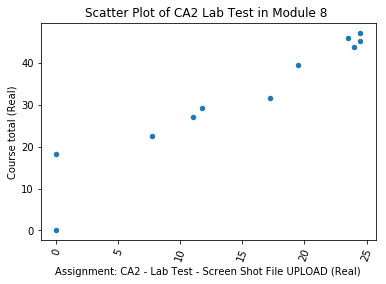

In [103]:
m8mg.plot(kind='scatter', x='Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', y='Course total (Real)', rot=70)
plt.title('Scatter Plot of CA2 Lab Test in Module 8 ')


In [104]:
m8og_subset.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,0


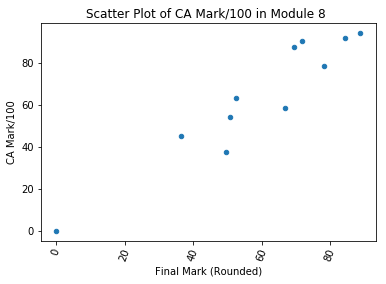

In [106]:
m8og_subset.plot(kind='scatter', x='Final Mark (Rounded)', y='CA Mark/100', rot=70)
plt.title('Scatter Plot of CA Mark/100 in Module 8 ')


In [110]:
Powerfeatselect8['engaged']

0       1
1       0
2       0
3       1
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      0
24      0
25      0
26      0
27      1
28      1
29      1
       ..
996     1
997     1
998     1
999     0
1000    1
1001    1
1002    1
1003    1
1004    1
1005    1
1006    1
1007    1
1008    1
1009    1
1010    1
1011    1
1012    0
1013    1
1014    1
1015    1
1016    0
1017    0
1018    0
1019    1
1020    0
1021    1
1022    0
1023    0
1024    1
1025    1
Name: engaged, Length: 1026, dtype: int64

In [112]:
merge_subset8['engaged']

0       1
1       0
2       0
3       1
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      0
24      0
25      0
26      0
27      1
28      1
29      1
       ..
996     1
997     1
998     1
999     0
1000    1
1001    1
1002    1
1003    1
1004    1
1005    1
1006    1
1007    1
1008    1
1009    1
1010    1
1011    1
1012    0
1013    1
1014    1
1015    1
1016    0
1017    0
1018    0
1019    1
1020    0
1021    1
1022    0
1023    0
1024    1
1025    1
Name: engaged, Length: 1026, dtype: int64

In [36]:
final8 = module8og['Final Mark (Rounded)']

In [37]:
final8.head(2)

0    66.71
1     0.00
Name: Final Mark (Rounded), dtype: float64

In [38]:
mean_grades, sims = [], 1000


In [39]:
for i in range(sims):
    temp_sample = np.random.choice(final8, replace=True, size=len(final8))
    sample_mean = np.mean(temp_sample)
    mean_grades.append(sample_mean)

In [40]:
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_grades)
boot_95_ci = np.percentile(mean_grades, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 58.9984209090909, 95% CI = [ 44.92740909  71.52829545]
